In [30]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv('dataset.csv')

<AxesSubplot:>

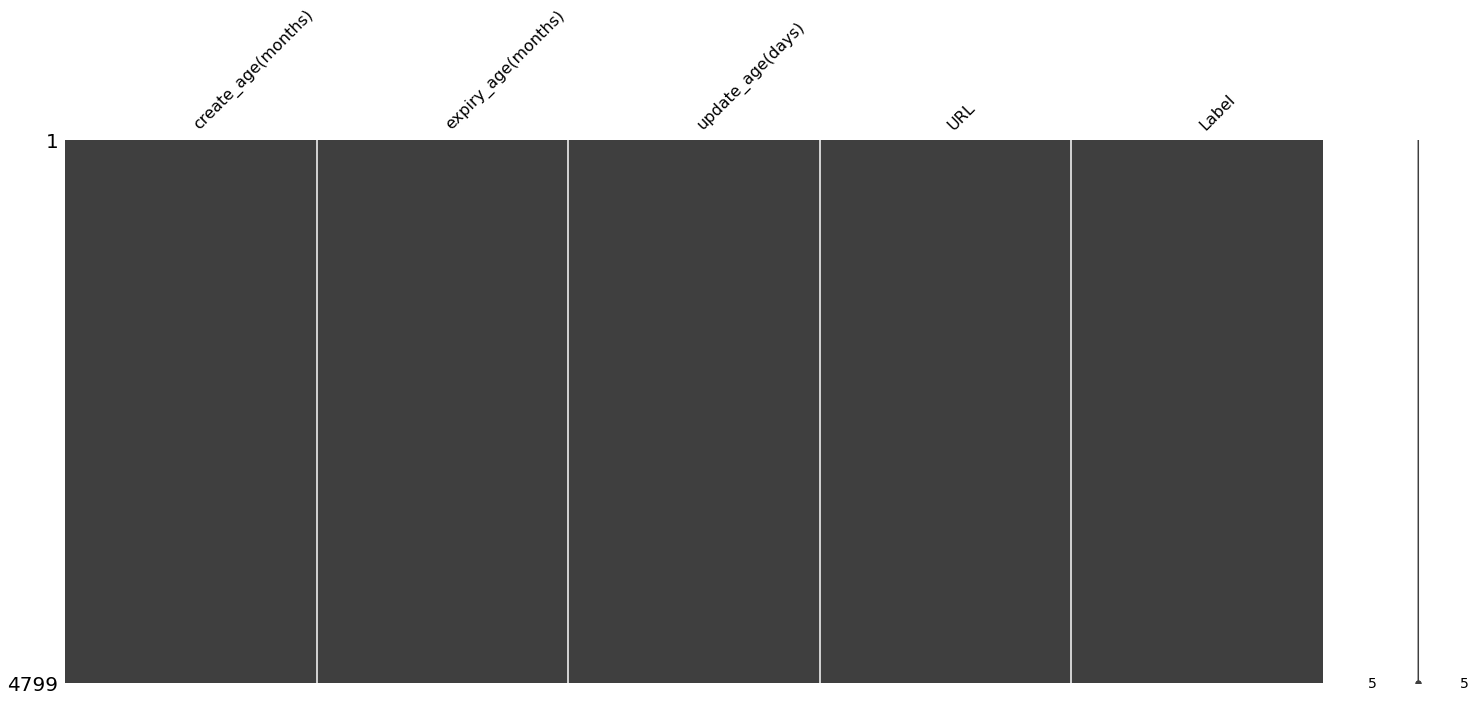

In [10]:
#msno.matrix(df)

In [18]:
# df2 --> impute missing values with mean
df2 = df

In [20]:
df2.shape

(4799, 5)

In [23]:
df2.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1
1,212,16,663,http://www.coffeespecialties.com/...,0
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198,6,186,http://atomicsoda.com/manutd...,0
4,240,24,1684,http://bostoncoffeecake.com/...,0


In [25]:
# replace negative values with Nan 
df2['create_age(months)'][df2['create_age(months)']<0]=np.nan
df2['expiry_age(months)'][df2['expiry_age(months)']<0]=np.nan
df2['update_age(days)'][df2['update_age(days)']<0]=np.nan

<ipython-input-25-18d4af57e113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['create_age(months)'][df2['create_age(months)']<0]=np.nan
<ipython-input-25-18d4af57e113>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['expiry_age(months)'][df2['expiry_age(months)']<0]=np.nan
<ipython-input-25-18d4af57e113>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['update_age(days)'][df2['update_age(days)']<0]=np.nan


In [27]:
# replace Nan with mean of the column
df2['create_age(months)'].fillna((df2['create_age(months)'].mean()),inplace=True)
df2['expiry_age(months)'].fillna((df2['expiry_age(months)'].mean()),inplace=True)
df2['expiry_age(months)'].fillna((df2['update_age(days)'].mean()),inplace=True)

In [41]:
df2.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,130.617831,17.155511,394.380048,http://account-google-com.ngate.my/c44cca40176...,1
1,212.000000,16.000000,663.000000,http://www.coffeespecialties.com/...,0
2,130.617831,17.155511,394.380048,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198.000000,6.000000,186.000000,http://atomicsoda.com/manutd...,0
4,240.000000,24.000000,1684.000000,http://bostoncoffeecake.com/...,0


In [ ]:
# normalize the data
MinMaxScaler
df2[]=MinMaxScaler().fit_transform(df2[].reshape(-1,1))

In [31]:
#df3 --> Delete rows with missing values
df3 = df

In [36]:
df3 = df3[(df3['create_age(months)']>0) & (df3['expiry_age(months)']>0) & (df3['expiry_age(months)'])]

In [39]:
print('Shape of Original Data',df.shape)
print('Shape of removed rows with negative values',df3.shape)

Shape of Original Data (4799, 5)
Shape of removed rows with negative values (4739, 5)


In [40]:
df3

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,130.617831,17.155511,394.380048,http://account-google-com.ngate.my/c44cca40176...,1
1,212.000000,16.000000,663.000000,http://www.coffeespecialties.com/...,0
2,130.617831,17.155511,394.380048,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198.000000,6.000000,186.000000,http://atomicsoda.com/manutd...,0
4,240.000000,24.000000,1684.000000,http://bostoncoffeecake.com/...,0
...,...,...,...,...,...
4794,52.000000,8.000000,118.000000,http://aridfoods.com/V4/MGen/F97a8a294cf7c5e90...,1
4795,130.617831,17.155511,394.380048,http://www.mazda.co.jp/...,0
4796,130.617831,17.155511,394.380048,http://www.fotografaemsaopaulo.com.br/wp-admin...,1
4797,130.617831,17.155511,394.380048,http://agenda.wehrensarl.ch/libraries/joomla/h...,1
